### NPT part

In [1]:
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def plot_xvg(file, xvg_type, xvg_units, figsize=(6,2), dpi=100):
    """
    This function plots an xvg file with time on x axis and property on y.
    """
    times = []
    props = []
    with open(file) as xvg:
        for line in xvg.readlines():
            if '#' not in line and '@' not in line:
                nums = line.split()
                time = nums[0]
                prop = nums[1]
                times.append(float(time))
                props.append(float(prop))
    

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.plot(times[1:], props[1:])
    ax.set_xlabel('Time (ps)', fontsize=14)
    ax.set_ylabel(f'{xvg_type} ({xvg_units})', fontsize=14)
    ax.set_title(f'{xvg_type} vs Time', fontsize=16)

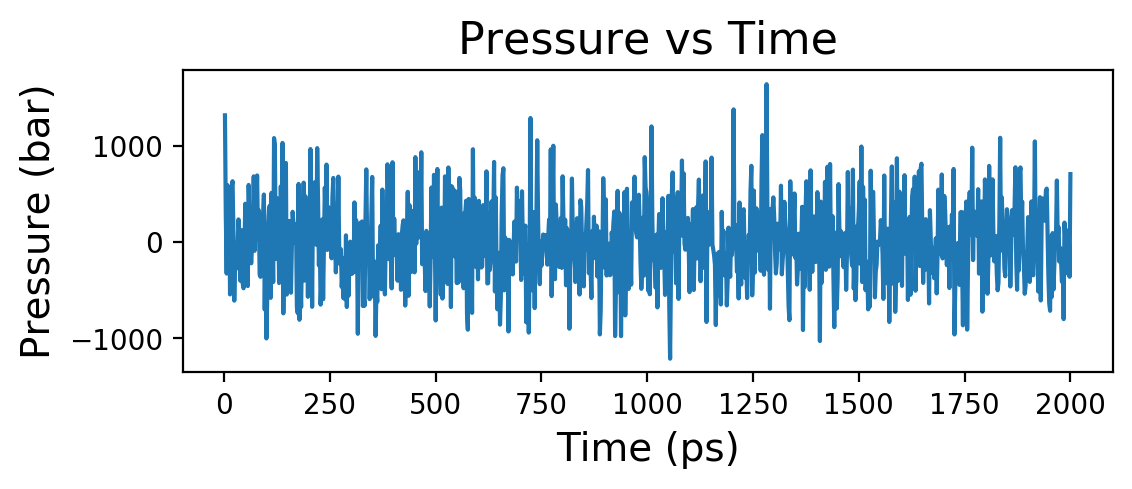

In [4]:
plot_xvg('npt_data/pressure.xvg', 'Pressure', 'bar',dpi=200)

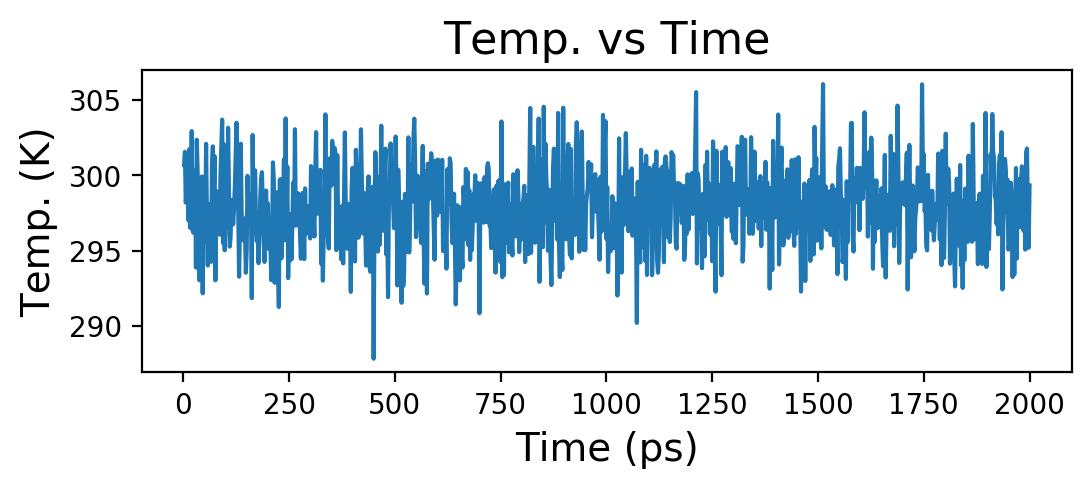

In [5]:
plot_xvg('npt_data/temp.xvg', 'Temp.', 'K', dpi=200)

### Scaling analysis part

In [6]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os

In [9]:
data = {}
for filename in os.listdir('scaling_analysis'):
    if filename.startswith('log'):
        with open(f'scaling_analysis/{filename}') as file:
            for line in file.readlines():
                if line.startswith('Performance'):
                    data[filename] = float(line.split()[1])

In [10]:
for key in data:
    data[key] = [data[key]]
df = pd.DataFrame(data)
df = df.transpose()

In [11]:
df['cpus'] = [4, 6, 4, 16, 2]

Text(0, 0.5, 'ns/day')

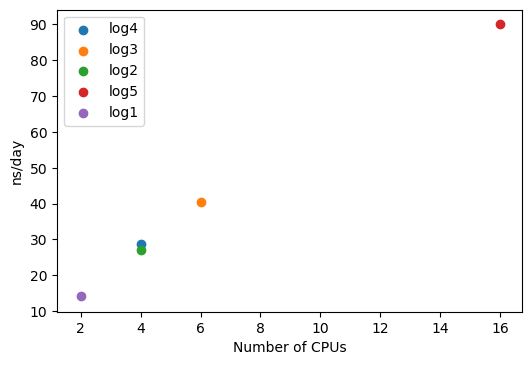

In [12]:
fig, ax = plt.subplots(dpi=100)
for i, row in df.iterrows():
    plt.scatter(row['cpus'], row[0], label=row.name)

plt.legend()
ax.set_xlabel('Number of CPUs')
ax.set_ylabel('ns/day')

4 ranks and 4 threads per rank is fastest by a long shot!

### NVT analysis

In [14]:
def get_xvg_data(file):
    """
    This function plots an xvg file with time on x axis and property on y.
    """
    times = []
    props = []
    with open(file) as xvg:
        for line in xvg.readlines():
            if '#' not in line and '@' not in line:
                nums = line.split()
                time = nums[0]
                prop = nums[1]
                times.append(float(time))
                props.append(float(prop))
    

    return times, props

In [19]:
times_500_temp, temp_500 = get_xvg_data('nvt_data/500_data/500_temp.xvg')
times_500_press, press_500 = get_xvg_data('nvt_data/500_data/500_pressure.xvg')

In [29]:
times_273_temp, temp_273 = get_xvg_data('nvt_data/273_data/273_temperature.xvg')
times_273_press, press_273 = get_xvg_data('nvt_data/273_data/273_pressure.xvg')

Text(0.5, 1, 'Pressure vs Time for the 273/500K simulations')

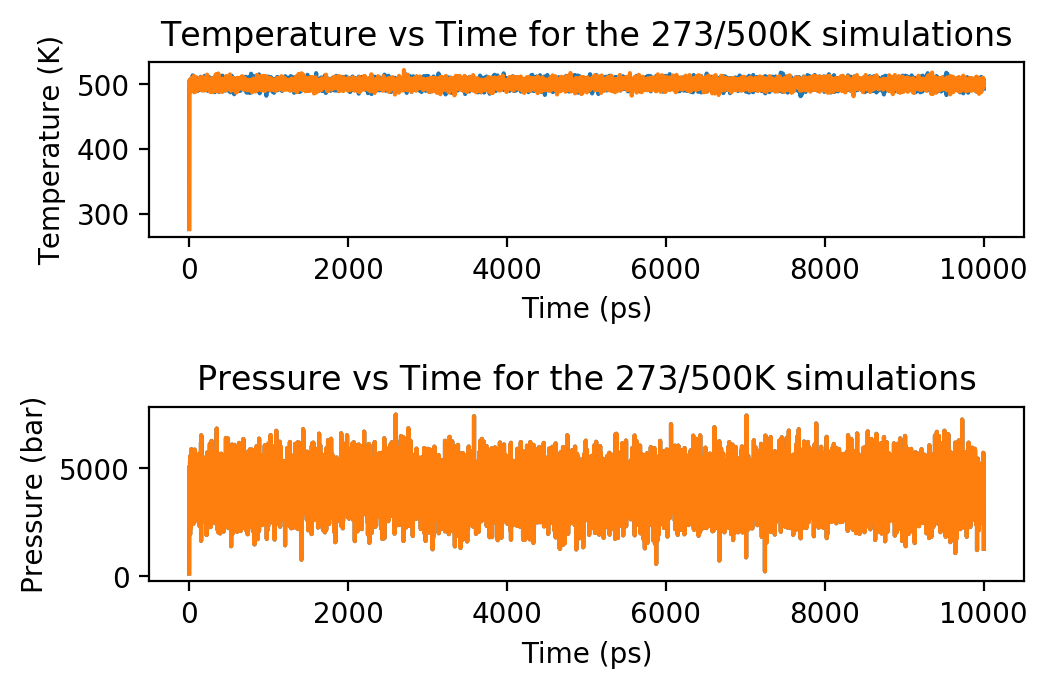

In [34]:
fig1, ax1 = plt.subplots(2,1, dpi=200)
fig1.tight_layout(pad=4)

ax1[0].plot(times_500_temp, temp_500)
ax1[0].plot(times_273_temp, temp_273)
ax1[0].set_xlabel('Time (ps)')
ax1[0].set_ylabel('Temperature (K)')
ax1[0].set_title('Temperature vs Time for the 273/500K simulations')

ax1[1].plot(times_500_press, press_500)
ax1[1].plot(times_273_press, press_273)
ax1[1].set_xlabel('Time (ps)')
ax1[1].set_ylabel('Pressure (bar)')
ax1[1].set_title('Pressure vs Time for the 273/500K simulations')

## ALRIGHT! Are you thinking what I'm thinking????

### YEP... Dave fucked up and made tref 500K in both simulations by accident. SICK

In [35]:
times_500_density, density_500 = get_xvg_data('nvt_data/500_data/500_density.xvg')
times_273_density, density_273 = get_xvg_data('nvt_data/273_data/273_density.xvg')

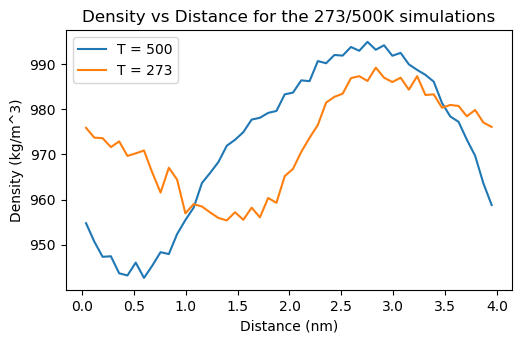

In [42]:
fig2, ax2 = plt.subplots(1,1, dpi=100)
fig2.tight_layout(pad=4)

ax2.plot(times_500_density, density_500, label='T = 500')
ax2.plot(times_273_density, density_273, label='T = 273')
ax2.set_xlabel('Distance (nm)')
ax2.set_ylabel('Density (kg/m^3)')
ax2.set_title('Density vs Distance for the 273/500K simulations')
plt.legend()

Well... I think it's actually acceptable that these turned out different. Again, both of these are actually at 500K